In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Bio import Entrez
from tqdm import tqdm

In [4]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


In [55]:
gene_symbols = data["gene-symbol"].values

# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

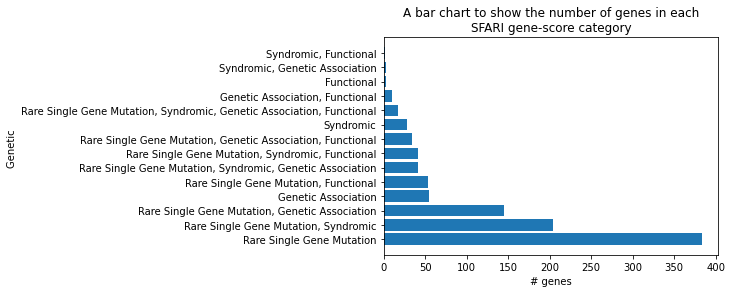

In [5]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.barh(gene_cat_vals, gene_cat_counts)
plt.xlabel("# genes")
plt.ylabel("Genetic ")
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

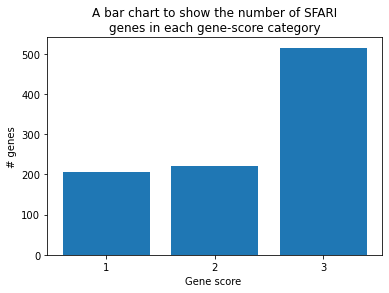

In [65]:
gene_cats_data = data['gene-score']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

fig = plt.figure()
plt.bar(gene_cat_vals, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(gene_cat_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1.pdf', dpi=fig.dpi)

In [61]:
gene_cat_vals

array([ 3.,  2.,  1., nan])

['1.0', '2.0', '3.0', 'nan']


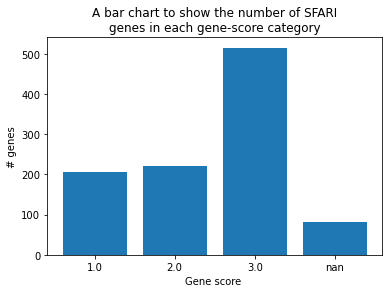

In [83]:
gene_cats_data = data.sort_values("gene-score")['gene-score']
gene_cat_vals = gene_cats_data.unique()
gene_cat_counts = []
for g in gene_cat_vals:
    if np.isnan(g):
        score_indexes = gene_cats_data[gene_cats_data.isnull()].index
    else:
        score_indexes = gene_cats_data[gene_cats_data == g].index
    gene_cat_counts.append(score_indexes.size)
    

A, B = gene_cat_vals.size, len(gene_cat_counts)
assert(A == B)

ticks = np.arange(gene_cat_vals.size)
tick_vals = [str(val) for val in gene_cat_vals]
print(tick_vals)

fig = plt.figure()
plt.bar(ticks, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(ticks, tick_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1-v2.pdf', dpi=fig.dpi)

# task 2

In [6]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [118]:
gs = data["gene-symbol"]
data.iloc[gs[gs == "RP11-1407O15.2"].index[0]]

status                                       9
gene-symbol                     RP11-1407O15.2
gene-name                                  NaN
ensembl-id                                 NaN
chromosome                                  17
genetic-category     Rare Single Gene Mutation
gene-score                                 3.0
syndromic                                    0
number-of-reports                            1
Name: 771, dtype: object

In [5]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [7]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i]["number-of-reports"])
    print()

780
68

789
75

510
90

812
92

596
94



# task 3

In [ ]:
# This task was completed manually

# task 4

In [82]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [83]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

In [84]:
year_data2 = []
#citation_data = []
#pmids = []

for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data2.append(gene_data["Publication Year"].values.tolist())
    #citation_data.append(gene_data["Citation"].values.size)
    #pmids.append(gene_data["PMID"].values.tolist())

In [85]:
gene_data["Citation"]

0     Epilepsia. 2019 Dec;60 Suppl 3:S17-S24. doi: 1...
1     Neuron. 2020 May 6;106(3):421-437.e11. doi: 10...
2     Nature. 2012 Apr 4;485(7397):246-50. doi: 10.1...
3     Nature. 2012 Sep 20;489(7416):385-90. doi: 10....
4     Nat Genet. 2011 Jun;43(6):585-9. doi: 10.1038/...
                            ...                        
63    Pract Neurol. 2017 Aug;17(4):314-317. doi: 10....
64    J Pediatr Neurosci. 2012 May;7(2):123-5. doi: ...
65    J Neurosci. 2004 Mar 17;24(11):2690-8. doi: 10...
66    Gene. 2013 Dec 15;532(2):294-6. doi: 10.1016/j...
67    J Child Neurol. 2004 Aug;19(8):597-603. doi: 1...
Name: Citation, Length: 68, dtype: object

# Task 5

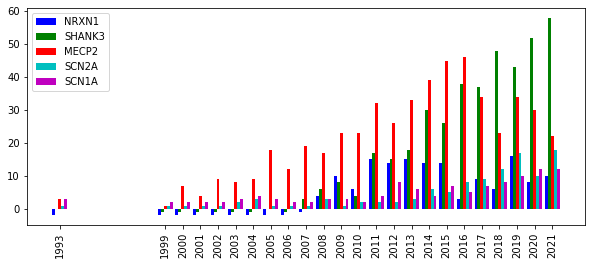

In [14]:
ax = plt.subplot()

width = 1
offsets = [-width*2, -width, 0, width, width*2]
colours = ["b", "g", "r", "c", "m"]
new_years = years*6
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=width, color=colours[f], align="center", label=genes[f])
    #print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

Text(0, 0.5, '# papers published')

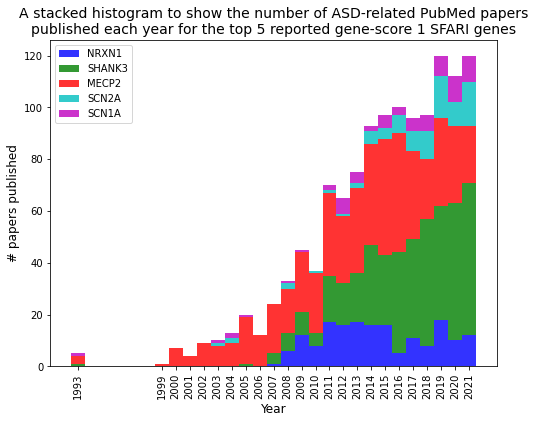

In [96]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(year_data2, range(1993,2023), density=0, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of ASD-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [101]:
year_data2

[[2017,
  2020,
  2008,
  2019,
  2021,
  2017,
  2019,
  2020,
  2019,
  2017,
  2018,
  2013,
  2013,
  2013,
  2014,
  2011,
  2019,
  2012,
  2021,
  2016,
  2019,
  2019,
  2020,
  2018,
  2015,
  2011,
  2009,
  2015,
  2020,
  2012,
  2013,
  2007,
  2012,
  2013,
  2020,
  2020,
  2019,
  2016,
  2009,
  2012,
  2017,
  2010,
  2011,
  2009,
  2011,
  2018,
  2012,
  2021,
  2012,
  2009,
  2011,
  2020,
  2020,
  2019,
  2017,
  2011,
  2010,
  2017,
  2021,
  2012,
  2019,
  2014,
  2014,
  2013,
  2018,
  2012,
  2011,
  2011,
  2010,
  2015,
  2015,
  2013,
  2012,
  2009,
  2012,
  2014,
  2013,
  2015,
  2009,
  2013,
  2019,
  2019,
  2021,
  2019,
  2021,
  2015,
  2015,
  2021,
  2012,
  2012,
  2017,
  2019,
  2014,
  2011,
  2014,
  2009,
  2010,
  2019,
  2014,
  2015,
  2014,
  2019,
  2013,
  2011,
  2014,
  2013,
  2017,
  2015,
  2008,
  2014,
  2021,
  2009,
  2014,
  2008,
  2012,
  2021,
  2010,
  2009,
  2011,
  2015,
  2019,
  2020,
  2016,
  2013,
  2018,


In [89]:
for i in range(5):
    print(len(year_data2[i]))

173
420
517
87
68


In [ ]:
# EXTENSION: plot citations too

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 5 colors were provided

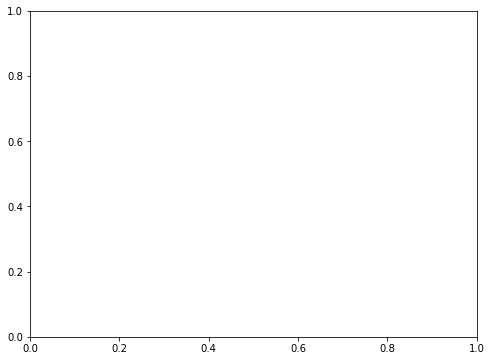

In [41]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(citation_data, range(1993,2023), density=1, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported SFARI genes with gene-score 1", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [119]:
Entrez.email = "s1803764@ed.ac.uk"
all_dates = []

for g in tqdm(genes):
    handle = Entrez.esearch(db="pubmed",retmax=1000, term=f"({g}) AND ((autism spectrum disorder) OR ((ASD) AND (autism)))")
    record = Entrez.read(handle)
    ids = record["IdList"]
    #print(g)
    
    dates = []
    for i in tqdm(ids):
        handle2 = Entrez.esummary(db="pubmed", retmax=1000, id=i)
        meta_data = Entrez.read(handle2)[0]
        #print(meta_data["PubDate"])
        dates.append(meta_data["PubDate"][0:4])

    all_dates.append(dates)

 77%|████████████████████████████████▏         | 95/124 [00:55<00:17,  1.70it/s]


 19%|████████▏                                 | 66/341 [00:39<02:43,  1.68it/s]


 48%|███████████████████▌                     | 163/341 [01:36<01:40,  1.77it/s]


 76%|███████████████████████████████▎         | 260/341 [02:31<00:46,  1.75it/s]


  5%|██                                        | 14/283 [00:08<03:01,  1.48it/s]


 39%|████████████████                         | 111/283 [01:06<01:36,  1.79it/s]


 73%|██████████████████████████████▏          | 208/283 [02:03<00:42,  1.76it/s]


 30%|████████████▊                              | 20/67 [00:12<00:27,  1.68it/s]


100%|████████████████████████████████████████████| 5/5 [08:30<00:00, 102.05s/it]


In [115]:
Entrez.email = "s1803764@ed.ac.uk"
num_pubs = []

for g in tqdm(gene_symbols):
    handle = Entrez.esearch(db="pubmed",retmax=2000, term=f"({g}) AND (ASD)")
    record = Entrez.read(handle)
    num_pubs.append(len(record["IdList"]))

100%|███████████████████████████████████████| 1023/1023 [10:29<00:00,  1.63it/s]


In [134]:
from collections import Counter

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    print()
    
    #if len(el) == 1000:
    #    print(gene_symbols[i])
        
    #print()

NRXN1
124
Counter({2019: 15, 2013: 12, 2012: 12, 2021: 11, 2015: 11, 2014: 11, 2011: 9, 2009: 9, 2020: 8, 2018: 7, 2017: 5, 2010: 5, 2008: 5, 2016: 3, 2007: 1})

SHANK3
341
Counter({2021: 49, 2020: 45, 2018: 40, 2019: 39, 2016: 33, 2017: 31, 2015: 23, 2014: 21, 2013: 13, 2012: 13, 2011: 13, 2009: 8, 2008: 5, 2007: 4, 2010: 2, 1993: 1, 2005: 1})

MECP2
283
Counter({2016: 31, 2014: 22, 2019: 21, 2011: 21, 2017: 17, 2015: 17, 2020: 16, 2012: 16, 2010: 16, 2018: 15, 2021: 13, 2009: 13, 2008: 13, 2013: 12, 2007: 11, 2005: 10, 2003: 5, 2006: 4, 2004: 4, 2002: 2, 2000: 2, 1993: 1, 2001: 1})

SCN2A
67
Counter({2021: 14, 2019: 13, 2020: 8, 2018: 7, 2017: 5, 2016: 5, 2014: 4, 2015: 2, 2013: 2, 2008: 2, 2004: 2, 2012: 1, 2010: 1, 2003: 1})

SCN1A
41
Counter({2021: 7, 2020: 6, 2012: 5, 2019: 4, 2018: 4, 2013: 3, 2016: 2, 2015: 2, 2004: 2, 1993: 1, 2011: 1, 2009: 1, 2008: 1, 2005: 1, 2003: 1})



Text(0, 0.5, '# papers published')

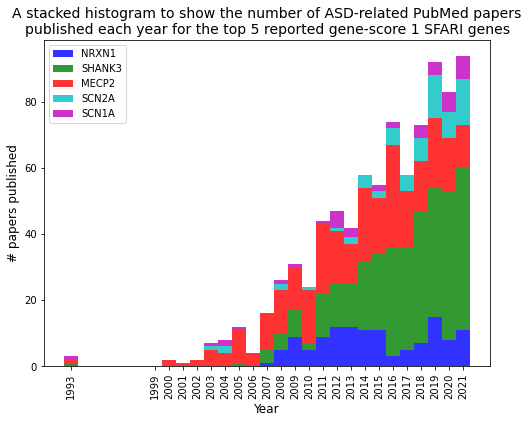

In [125]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(all_dates, range(1993,2023), density=0, histtype="bar", stacked=True, color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of ASD-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)